# Diabetes dataset - EDA

## Abstract

1. Is this a classification or regression problem?
2. How many features are present? Are they all comntinuous or are there any categorical features? If so, are there any ordinal features?
3. What is the target variable, also referred to as the outcome variable?
4. If it is a classification problem, is the dataset imbalanced?
5. Are there duplicate data? How to deal with them?
6. Are there missing values? If so, how to deal with them?
7. Are there outlier samples? How to identify them?
8. Plot the distribution of the following features: Glucose, BP, Skin thickness, BMI. What distribution do you observe? How about the distribution of the features Pedigree and Age? How about the features Pregnancies and Insulin?

In [17]:
## Load essential libraries
import numpy as np
import pandas as pd
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.style.use('seaborn-whitegrid')
%matplotlib inline

import scipy.stats
from scipy.stats import *

import warnings
warnings.filterwarnings("ignore")

In [18]:
import sklearn
sklearn.__version__

'1.2.2'

In [19]:
#change the directory to your machine 

DIR='D:/ME/Lab/Workshop/EDA/Project_EDA_Workshops'
DATA_DIR=DIR+'/Data/'

In [20]:
## Load the diabetes dataset
FILENAME = DATA_DIR + 'diabetes.csv'
df = pd.read_csv(FILENAME)
print('Diabetes dataset')
print('-----------')
print('Initial number of samples = %d'%(df.shape[0]))
print('Initial number of features = %d\n'%(df.shape[1]))
df.head(5)

Diabetes dataset
-----------
Initial number of samples = 2000
Initial number of features = 9



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


## EDA Begins

In [21]:
## Check missing values across all features
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [22]:
## How many missing values in total across all features?
df.isna().sum() #There are no na

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Text(0, 0.5, '% Missing Values')

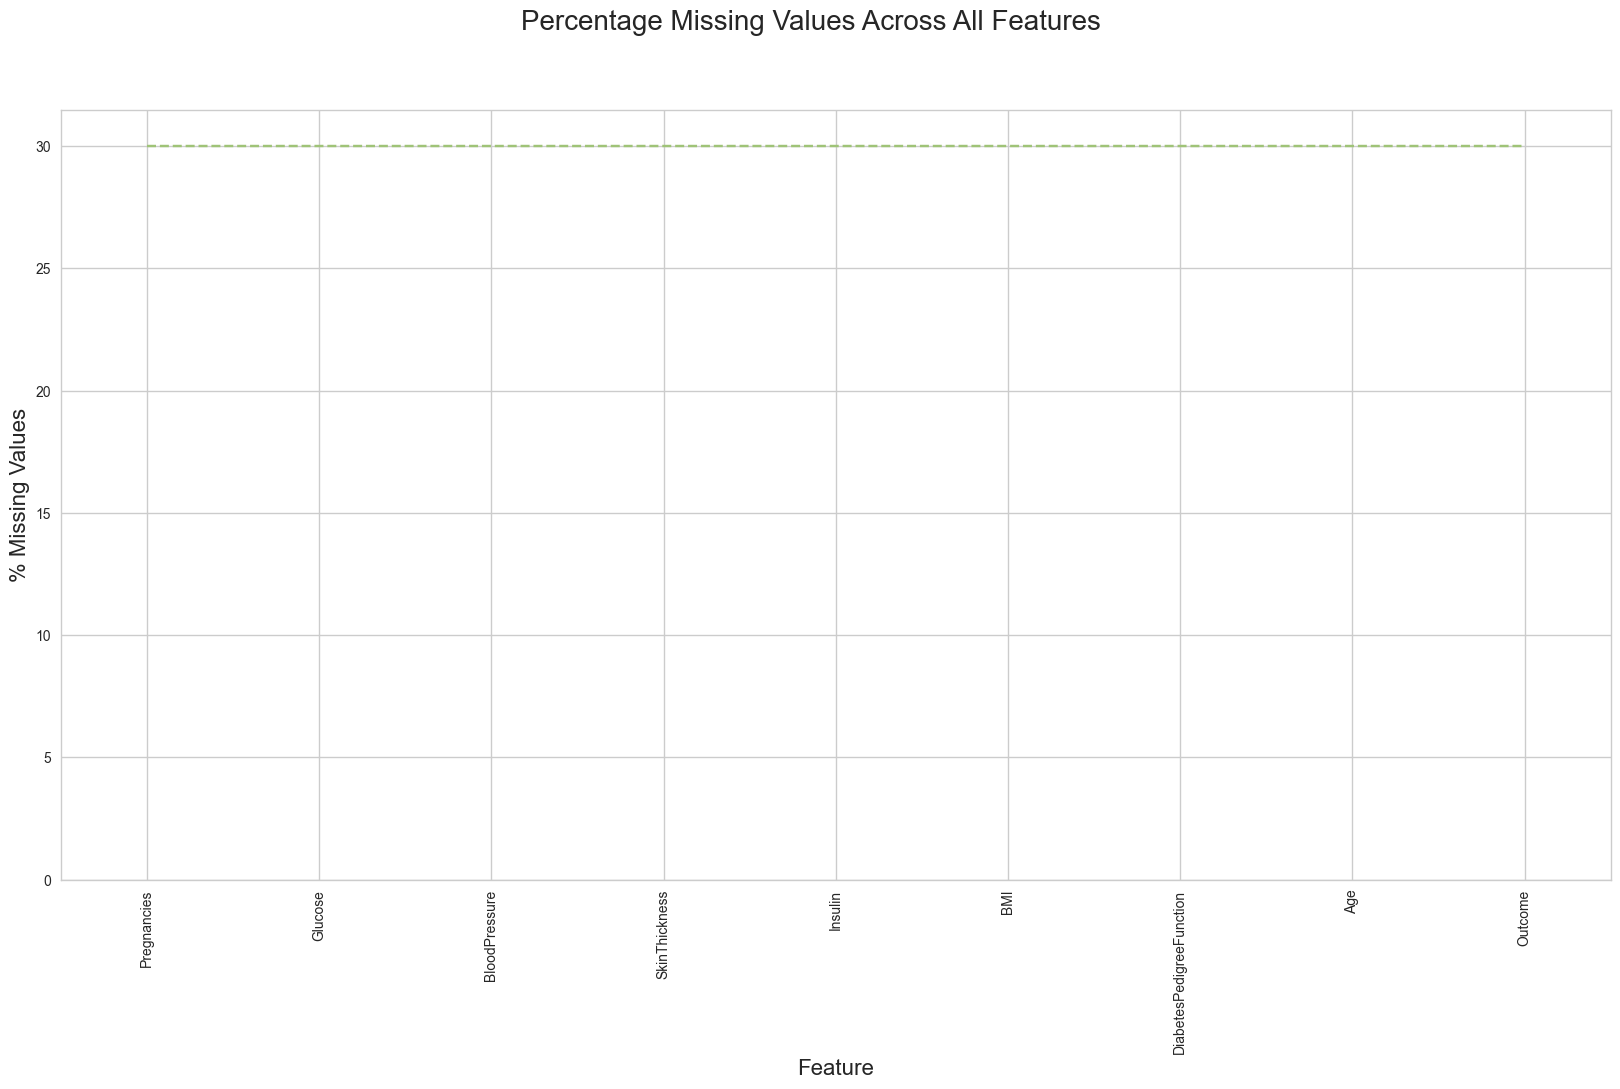

In [23]:
## Plot percentage of missing values (NaNs) for each feature
cutoff = 30 # we will remove features missing in more than 30% of the samples
fig = plt.figure(figsize=(20,10))
percent_missing = (df.isna().sum() / df.shape[0]) * 100
percent_missing.plot(kind = 'bar', color = cm.rainbow(np.linspace(0, 1, 2))[(percent_missing <= cutoff).values.astype(int)])
plt.plot(np.arange(df.shape[1]), np.repeat(cutoff, df.shape[1]), 'g--')
fig.suptitle('Percentage Missing Values Across All Features', fontsize = 20)
plt.xlabel('Feature', fontsize = 16)
plt.ylabel('% Missing Values', fontsize = 16)

In [24]:
## Find null columns
# All columns wont be displayed on large column datasets if these are not specified: verbose=True, show_counts=True
df.info(verbose = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [25]:
## Check for duplicate samples
dupsSeries = df.duplicated() # returns a series with True False for every row
print(f"Number of duplicates = {dupsSeries.sum()}") # WOW 1256 duplicate rows. Need to be dropped
df.drop_duplicates(inplace=True)
df.info() # only 744 unique rows here

Number of duplicates = 1256
<class 'pandas.core.frame.DataFrame'>
Int64Index: 744 entries, 0 to 1568
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               744 non-null    int64  
 1   Glucose                   744 non-null    int64  
 2   BloodPressure             744 non-null    int64  
 3   SkinThickness             744 non-null    int64  
 4   Insulin                   744 non-null    int64  
 5   BMI                       744 non-null    float64
 6   DiabetesPedigreeFunction  744 non-null    float64
 7   Age                       744 non-null    int64  
 8   Outcome                   744 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 58.1 KB


In [26]:
## Print unique values across all features
df.nunique() # this is for identifying candidate features for encodings.

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                53
Insulin                     182
BMI                         247
DiabetesPedigreeFunction    505
Age                          52
Outcome                       2
dtype: int64

In [27]:
## Check if this is an imbalanced dataset
zeroClassCount = df[df["Outcome"] == 0]["Outcome"].count()
zeroClassCount/df.shape[0] #not exactly 50-50, quite imbalanced but not too bad. no need for drastic measure such as SMOTE

0.6599462365591398

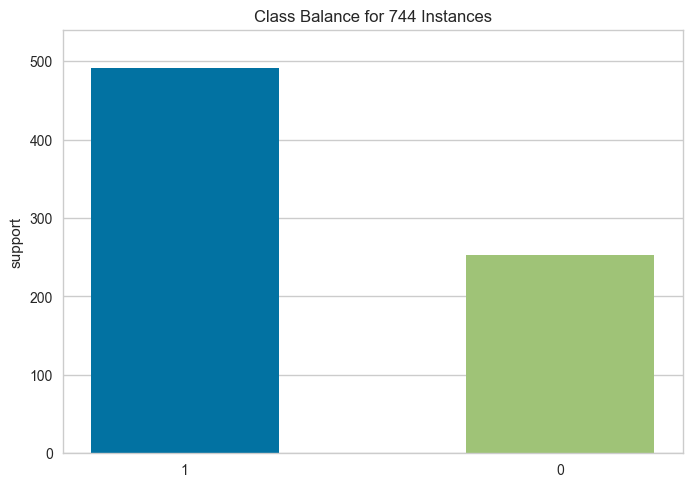

<Axes: title={'center': 'Class Balance for 744 Instances'}, ylabel='support'>

In [28]:
# Run this optional code only for visualization
# If you do not have yellowbricks, you can skip it
from yellowbrick.target import ClassBalance

visualizer = ClassBalance(labels=[1, 0])
visualizer.fit(df["Outcome"]) # Fit the data to the visualizer
visualizer.show() # Finalize and render the figure

<Axes: xlabel='Age', ylabel='Density'>

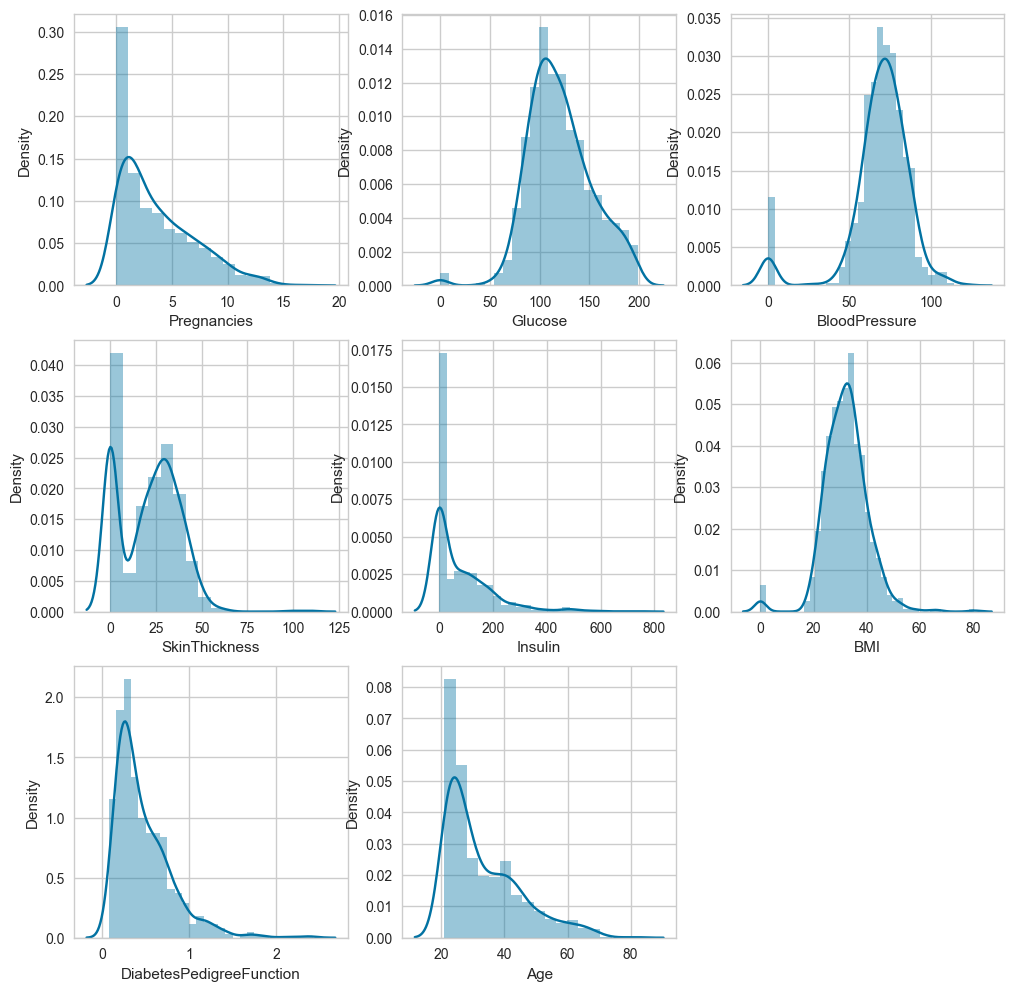

In [29]:
## Plot distributions of continuous features
plt.figure(figsize=(12,12))
plt.subplot(3,3,1)
sns.distplot(df.Pregnancies)
plt.subplot(3,3,2)
sns.distplot(df.Glucose)
plt.subplot(3,3,3)
sns.distplot(df.BloodPressure)
plt.subplot(3,3,4)
sns.distplot(df.SkinThickness)
plt.subplot(3,3,5)
sns.distplot(df.Insulin)
plt.subplot(3,3,6)
sns.distplot(df.BMI)
plt.subplot(3,3,7)
sns.distplot(df.DiabetesPedigreeFunction)
plt.subplot(3,3,8)
sns.distplot(df.Age)

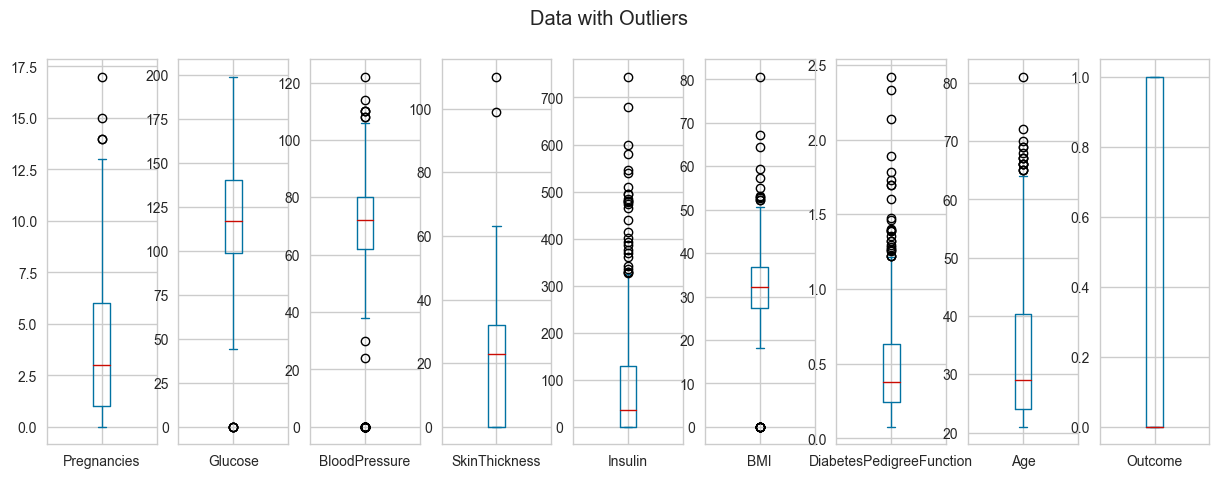

In [30]:
## Box-plot for detecting outliers across features
df.plot(kind="box",subplots=True,figsize=(15,5),title="Data with Outliers");

In [31]:
## How many 0 in each column
for col in df.columns:
    count = (df[col] == 0).sum()
    percentage = (count * 100)/df.shape[0]
    print(f'Count of zeros in Column {col} : {count}, percentage 0s: {percentage:.2f}%')

Count of zeros in Column Pregnancies : 112, percentage 0s: 15.05%
Count of zeros in Column Glucose : 5, percentage 0s: 0.67%
Count of zeros in Column BloodPressure : 34, percentage 0s: 4.57%
Count of zeros in Column SkinThickness : 215, percentage 0s: 28.90%
Count of zeros in Column Insulin : 359, percentage 0s: 48.25%
Count of zeros in Column BMI : 10, percentage 0s: 1.34%
Count of zeros in Column DiabetesPedigreeFunction : 0, percentage 0s: 0.00%
Count of zeros in Column Age : 0, percentage 0s: 0.00%
Count of zeros in Column Outcome : 491, percentage 0s: 65.99%


In [32]:
## High percentage of 0. Replace 0 with Nan
df[['Pregnancies', 'BloodPressure','SkinThickness','Insulin','BMI']] = df[['Pregnancies', 'BloodPressure','SkinThickness','Insulin','BMI']].replace(0, np.NaN)

In [33]:
## How many missing values now?
df.isna().sum()

Pregnancies                 112
Glucose                       0
BloodPressure                34
SkinThickness               215
Insulin                     359
BMI                          10
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

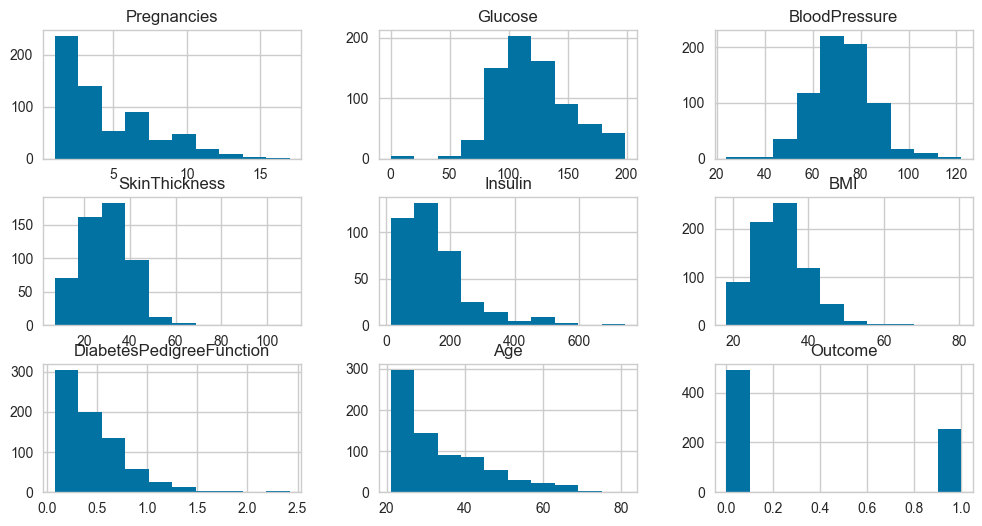

In [34]:
## Distribution after 0 to Nan Replacement
df.hist(figsize=(12,6))